
Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.



In [12]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots
import pandas as pd
import seaborn as sns

# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description



![image.png](attachment:image.png)

Please recreate this 4x4 grid, with each off-diagonal subplot showing the interaction between two features, with each of the three classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a histogram on that feature.     

You should create a function that, given data X and labels y, plots this 4x4 grid.  The function should be invoked as,
        
    myplotGrid(X,y)
    
where X is your training data and y are the labels. (There are libraries available that do this for us: e.g. pandas' pd.plotting.scatter_matrix, or seaborn, however here we want you to implement your own version).

In [13]:
#Convert to a pandas dataframe
iris_panda = pd.DataFrame(data= np.c_[X, y],
                     columns= iris['feature_names'] + ['target'])
target = iris_panda["target"]

print(iris_panda)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

<Figure size 432x288 with 0 Axes>

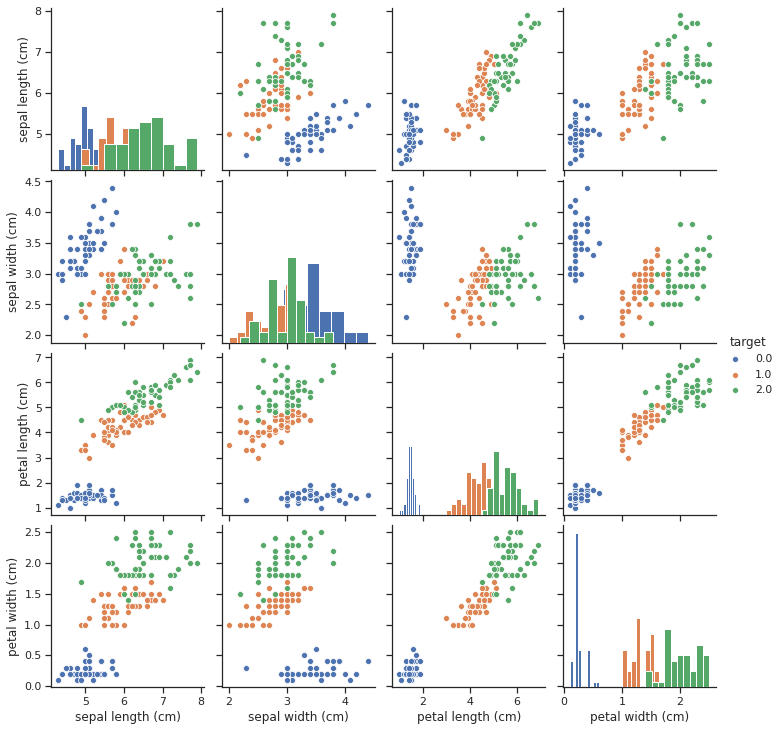

In [14]:
# run the plotting function with library

def myplotGrid(X, y):
    plt.figure()
    sns.set(style="ticks", color_codes=True)
    sns.pairplot(X, hue ='target', diag_kind = 'hist')
    plt.show()

# plt.figure()
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(iris_panda, hue ='target', diag_kind = 'hist')
# plt.show()

data = iris_panda
# Calling fuction 
myplotGrid(data, target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


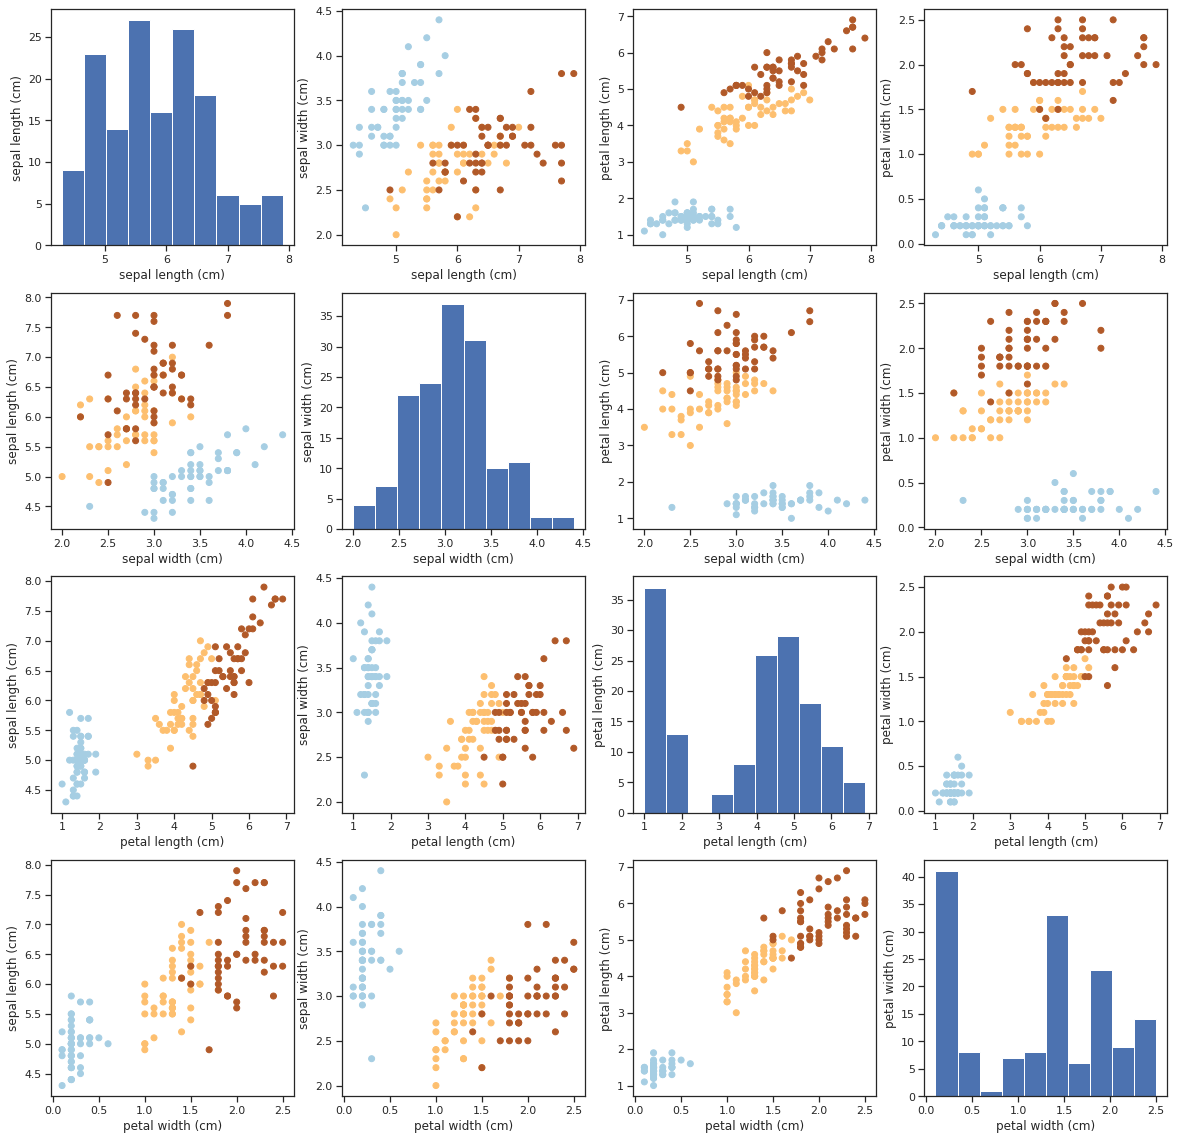

In [15]:
# MANUAL FUNCTION:

X=iris.data
Y=iris.target

def myplotGrid(X, y):
    fig, axs = plt.subplots(4, 4, figsize=(20,20))
    # This time we are drawing scatter on the subplot axes (ax) directly.
    feature_names = iris.feature_names
    print(feature_names)

    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if i == j:
                axs[i, j].hist(X[:,j])
                axs[i, j].set(xlabel=feature_names[i], ylabel=feature_names[j])
            else:
                axs[i, j].scatter(X[: , i], X[: , j], c=Y, cmap=plt.cm.Paired)
                axs[i, j].set(xlabel=feature_names[i], ylabel=feature_names[j])


# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()    

# Calling function
myplotGrid(X, Y)    


When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [22]:
# noise code 
clean_signal = pd.DataFrame(data= np.c_[X, y], columns= iris['feature_names'] + ['target']) 
import numpy as np 
import random 
import pandas as pd
mu, sigma = 0, 0.9 
noise = np.random.normal(mu, sigma, [150,4])
noise_signal = X + noise

sigg = clean_signal.drop(["target"], axis = 1)
tar = clean_signal["target"]

noi_signal = sigg + noise
noi_signal["target"] = tar


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


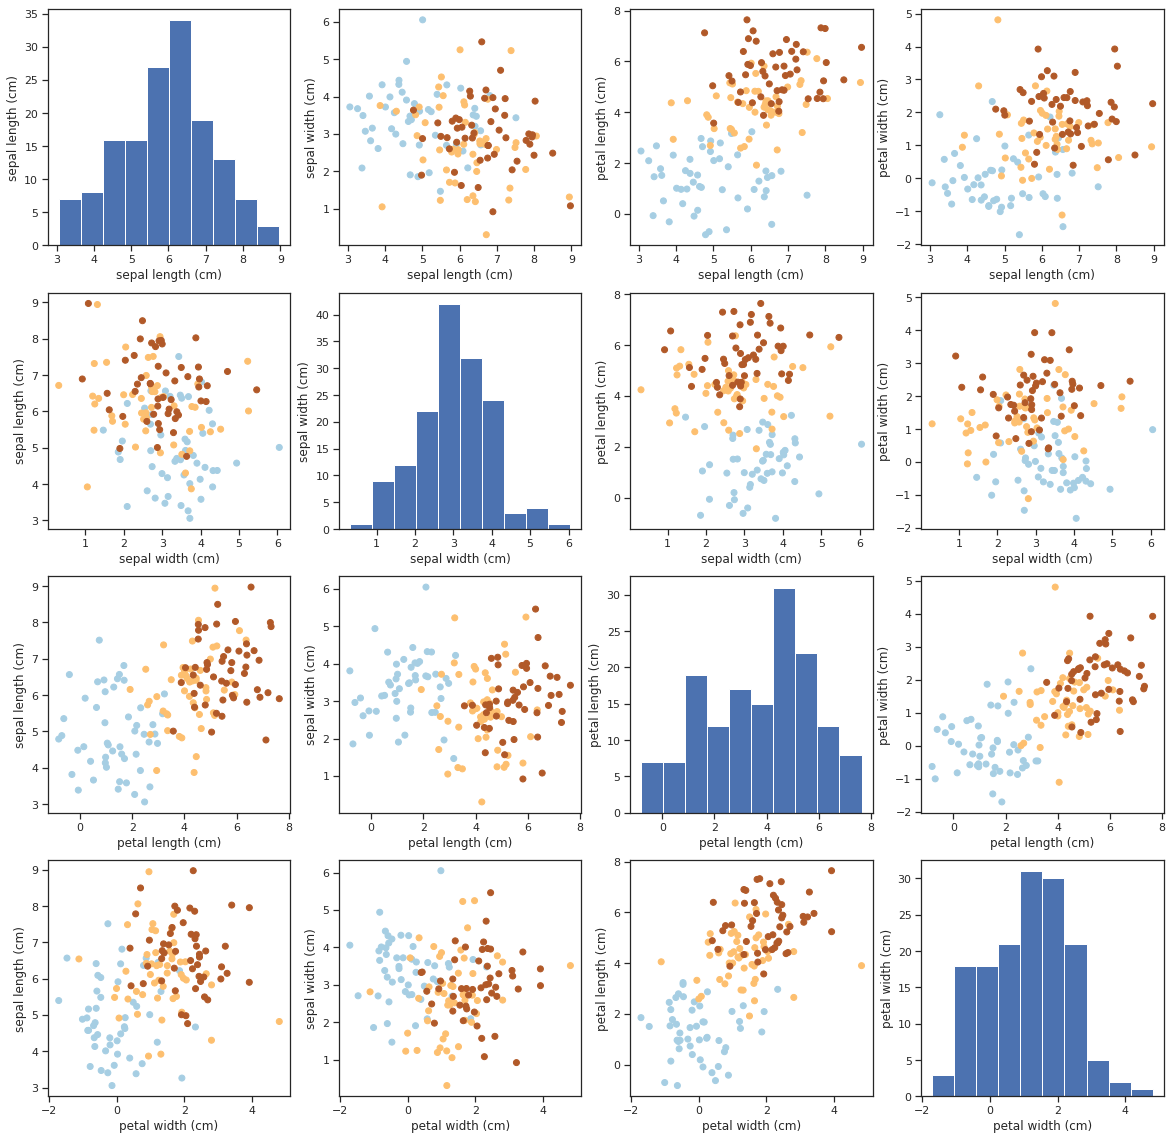

In [23]:

# data = clean_signal.drop(["target"], axis = 1)
# tar = clean_signal["target"]


XN =  noise_signal
y = Y
myplotGrid(XN, y)


In [24]:
from sklearn.metrics import confusion_matrix

# Distances
def euclidian(p1, p2): 
    dist = 0
    for i in range(len(p1)):
        dist = dist + np.square(p1[i]-p2[i])
    dist = np.sqrt(dist)
    return dist;

def manhattan(p1, p2): 
    dist = 0
    for i in range(len(p1)):
        dist = dist + abs(p1[i]-p2[i])
    return dist;

def minkowski(p1, p2, q): 
    dist = 0
    for i in range(len(p1)):
        dist = dist + abs(p1[i]-p2[i])**q
    dist = np.sqrt(dist)**(1/q)
    return dist;


# kNN Function
def kNN(X_train,y_train, X_test, k, dist='euclidian',q=2):
    pred = []
    # Adjusting the data type
    if isinstance(X_test, np.ndarray):
        X_test=pd.DataFrame(X_test)
    if isinstance(X_train, np.ndarray):
        X_train=pd.DataFrame(X_train)
        
    for i in range(len(X_test)):    
        # Calculating distances for our test point
        newdist = np.zeros(len(y_train))

        if dist=='euclidian':
            for j in range(len(y_train)):
                newdist[j] = euclidian(X_train.iloc[j,:], X_test.iloc[i,:])
    
        if dist=='manhattan':
            for j in range(len(y_train)):
                newdist[j] = manhattan(X_train.iloc[j,:], X_test.iloc[i,:])
    
        if dist=='minkowski':
            for j in range(len(y_train)):
                newdist[j] = minkowski(X_train.iloc[j,:], X_test.iloc[i,:],q)

        # Merging actual labels with calculated distances
        newdist = np.array([newdist, y_train])

        ## Finding the closest k neighbors
        # Sorting index
        idx = np.argsort(newdist[0,:])

        # Sorting the all newdist
        newdist = newdist[:,idx]
        #print(newdist)

        # We should count neighbor labels and take the label which has max count
        # Define a dictionary for the counts
        c = {'0':0,'1':0,'2':0 }
        # Update counts in the dictionary 
        for j in range(k):
            c[str(int(newdist[1,j]))] = c[str(int(newdist[1,j]))] + 1

        key_max = max(c.keys(), key=(lambda k: c[k]))
        pred.append(int(key_max))
        
        
    return pred



def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = random.randrange(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split 

def compute_confusion_matrix(true, pred):
    '''Computes a confusion matrix using numpy for two np.arrays
    true and pred.

    Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

    However, this function avoids the dependency on sklearn.'''

    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

def NestedkfoldCV(dataset, f=5, k=5, model="logistic"):
    data=cross_validation_split(dataset,f)
    result=[]
    conM = [] 
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        
        # apply the selected model
        # default is logistic regression
        if model == "logistic":
            # default: alpha=0.1, num_iter=30000
            # if you change alpha or num_iter, adjust the below line         
            c = logistic(cv[:,0:4],cv[:,4],data[i][:,0:4])
            test = c['Y_prediction_test']
        elif model == "knn":
            test = kNN(cv[:,0:4],cv[:,4],data[i][:,0:4],k)

        # calculate accuracy    
        acc=(test == data[i][:,4]).sum()
        result.append(acc/len(test))
        
        # confusion matrix code
        act = [int(i) for i in data[i][:,4]] 
        pred = [int(j) for j in test]
#         print(act)
#         print(pred)
        cm = compute_confusion_matrix(act, pred)
        conM.append(cm)
        
    return result, conM





In [25]:
# Prediction without noise

result, _ = NestedkfoldCV(clean_signal, f=5, k=5, model="knn")
result


[1.0, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]

In [26]:
# Prediction With noise

result, _ = NestedkfoldCV(noi_signal, f=5, k=5, model="knn")
result

[0.7666666666666667, 0.8, 0.8333333333333334, 0.7, 0.7333333333333333]


In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [27]:
def mykNN(X_train,y_train, X_test, k, dist='euclidian',q=2):
    pred = []
    # Adjusting the data type
    if isinstance(X_test, np.ndarray):
        X_test=pd.DataFrame(X_test)
    if isinstance(X_train, np.ndarray):
        X_train=pd.DataFrame(X_train)
        
    for i in range(len(X_test)):    
        # Calculating distances for our test point
        newdist = np.zeros(len(y_train))

        if dist=='euclidian':
            for j in range(len(y_train)):
                newdist[j] = euclidian(X_train.iloc[j,:], X_test.iloc[i,:])
    
        if dist=='manhattan':
            for j in range(len(y_train)):
                newdist[j] = manhattan(X_train.iloc[j,:], X_test.iloc[i,:])
    
        if dist=='minkowski':
            for j in range(len(y_train)):
                newdist[j] = minkowski(X_train.iloc[j,:], X_test.iloc[i,:],q)

        # Merging actual labels with calculated distances
        newdist = np.array([newdist, y_train])

        ## Finding the closest k neighbors
        # Sorting index
        idx = np.argsort(newdist[0,:])

        # Sorting the all newdist
        newdist = newdist[:,idx]
        #print(newdist)

        # We should count neighbor labels and take the label which has max count
        # Define a dictionary for the counts
        c = {'0':0,'1':0,'2':0 }
        # Update counts in the dictionary 
        for j in range(k):
            c[str(int(newdist[1,j]))] = c[str(int(newdist[1,j]))] + 1

        key_max = max(c.keys(), key=(lambda k: c[k]))
        pred.append(int(key_max))
        
        
    return pred


# This is test split
X_ = X[100:, 0:4]
# Calling the model function
y_ = mykNN(X,y,X_,5)

In [28]:
# helper code
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# mykNN code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## 3. Evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [30]:
# confusion matrix code
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])


## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [31]:
# myNestedCrossVal code

# for ifold in range (0, nFolds)

# # creating list of K for KNN
# k_list = list(range(1,50,2))
# # creating list of cv scores
# cv_scores = []

# # perform 10-fold cross validation
# for k in k_list:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())


# This is for clean Data

def myNestedkfoldCV(dataset, f=5, k=5, model="logistic"):
    data=cross_validation_split(dataset,f)
    result=[]
    conM = [] 
    # determine training and test sets 
    for i in range(f):
        r = list(range(f))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv=np.concatenate((cv,data[j]), axis=0)
        
        # apply the selected model
        # default is logistic regression
        if model == "logistic":
            # default: alpha=0.1, num_iter=30000
            # if you change alpha or num_iter, adjust the below line         
            c = logistic(cv[:,0:4],cv[:,4],data[i][:,0:4])
            test = c['Y_prediction_test']
        elif model == "knn":
            test = kNN(cv[:,0:4],cv[:,4],data[i][:,0:4],k)

        # calculate accuracy    
        acc=(test == data[i][:,4]).sum()
        result.append(acc/len(test))
        
        # confusion matrix code
        act = [int(i) for i in data[i][:,4]] 
        pred = [int(j) for j in test]
#         print(act)
#         print(pred)
        cm = compute_confusion_matrix(act, pred)
        conM.append(cm)
        
    return result, conM

_, clean_conmat = myNestedkfoldCV(clean_signal, f=5, k=5, model="knn")


In [32]:
# evaluate clean data code

for i, j in enumerate(clean_conmat):
    print("Confusion matrix for fold: {}".format(i))
    print(j)
    print()


Confusion matrix for fold: 0
[[ 8.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  2. 10.]]

Confusion matrix for fold: 1
[[11.  0.  0.]
 [ 0. 12.  0.]
 [ 0.  1.  6.]]

Confusion matrix for fold: 2
[[13.  0.  0.]
 [ 0.  8.  1.]
 [ 0.  0.  8.]]

Confusion matrix for fold: 3
[[ 9.  0.  0.]
 [ 0.  5.  1.]
 [ 0.  0. 15.]]

Confusion matrix for fold: 4
[[ 9.  0.  0.]
 [ 0. 12.  1.]
 [ 0.  0.  8.]]



In [35]:
# evaluate noisy  data code

# This is for clean Data

_, noise_conmat = NestedkfoldCV(noi_signal, f=5, k=5, model="knn")

for i, j in enumerate(noise_conmat):
    print("Confusion matrix for fold: {}".format(i))
    print(j)
    print()


Confusion matrix for fold: 0
[[10.  1.  0.]
 [ 1.  7.  1.]
 [ 0.  3.  7.]]

Confusion matrix for fold: 1
[[12.  1.  0.]
 [ 0.  6.  1.]
 [ 0.  2.  8.]]

Confusion matrix for fold: 2
[[3. 0. 0.]
 [3. 8. 5.]
 [0. 4. 7.]]

Confusion matrix for fold: 3
[[11.  1.  0.]
 [ 0.  8.  3.]
 [ 0.  2.  5.]]

Confusion matrix for fold: 4
[[10.  1.  0.]
 [ 0.  6.  1.]
 [ 0.  4.  8.]]



## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:
0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8333333333333334,
 0.7666666666666667]


| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.96  |  5 | "euclidian"  |
| 2 | 1.0  |  5 | "euclidian"  |
| 3 | 0.9  |  5 | "euclidian"  |
| 4 | 0.93  |  5 | "euclidian"  |
| 5 | 0.96  |  5 | "euclidian"  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.83  |  5 | "euclidian"  |
| 2 | 0.83  |  5 | "euclidian"  |
| 3 | 0.8  |  5 | "euclidian"  |
| 4 | 0.83  |  5 | "euclidian"  |
| 5 | 0.76  |  5 | "euclidian"  |
| **total** | .? $\pm$ ? |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


CLEAN


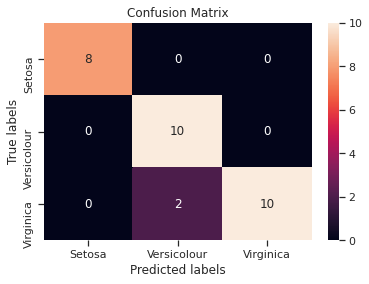

In [36]:
print('CLEAN')
# clean data summary results

ax= plt.subplot()
sns.heatmap(clean_conmat[0], annot=True, ax = ax); 


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica']); ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica']);



NOISY


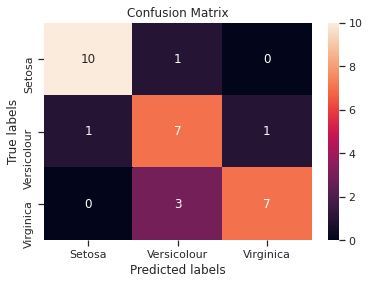

In [37]:
print('NOISY')
# clean data summary results

ax= plt.subplot()
sns.heatmap(noise_conmat[0], annot=True, ax = ax); 


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica']); ax.yaxis.set_ticklabels(['Setosa', 'Versicolour', 'Virginica']);


## 6. Questions [15 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in new Markdown cells below each question.

### Q1. Exploratory data analysis
Looking again at the exploratory data analysis, what do you observe by plotting the figure for data without noise? What do you observe when you add Gaussian noise and plot again? 

Answer: 
The distribution of data got affected. There was change in the values, so outliers were observed.

### Q2.	 Choice of parameters
In your implementation, do the best parameters change per fold? Can you say that one parameter choice is better regardless of the data used? 

Answer: No the parameters were fixed in all the folds. Yes the paramter choice is important regardless of data. Otherwise it is very hard to make the model generalize on test data in the first go.  


### Q3. Clean vs. noisy
Does the best parameter choice change depending on whether we use clean or noisy data? (Answer for both distance function and number of neighbours.)

Answer: No the parameter choice remained same for both clean and noisy data. There was no significant change in the accuracy, therefore kept both same.



### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: 
class1 = []
class2 = []
If manhattan_distance(pt1, pt2) > 5:
    class1.append(pt1)
   
else:
    class2.append(pt2)

### Q5.	Beyond Iris 
If you were to run your k-nn algorithm on a new dataset, what considerations would you need to be taken into consideration? Outline any changes that might be needed to your code. 


Answer:
I will change number of nearest neighbor, then I will change the number of cross validation folds. There are the two important changes i will take into account.
